### Extração de texto do certificado Udemy

In [1]:
import cv2
from glob import glob
import matplotlib.pyplot as plt
import os
import pandas as pd
import re

import time

import pytesseract

import pdf2image

from pdf2image import convert_from_path
from pdf2image.exceptions import PDFPageCountError

##### Funções básicas

In [2]:
path = r'C:\Users\shuel\Documents\Workspace\computer-vision\computer-vision-meganha\010-pytesseract\others'

In [3]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [4]:
tessdata_dir_config = r'--tessdata-dir "C:\Program Files\Tesseract-OCR\tesseract.exetessdata"'

In [5]:
# Variaveis
INFO_LIMPO = []
NOME = []
LOGCORROMPIDO = []

# Funcoes basicas
def verificar_pasta(caminho:str) -> str:
    # Verificar se pasta Repositorio existe

    if caminho == False:
        print(f'A pasta {caminho} não existe. Criando diretório.')
        os.mkdir(caminho)

    else:
        print(f'A pasta {caminho} existe')

verificar_pasta(path)
pdfs_files = glob(path + r'\*.pdf')

A pasta C:\Users\shuel\Documents\Workspace\computer-vision\computer-vision-meganha\010-pytesseract\others existe


In [6]:
pdfs_files

['C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\010-pytesseract\\others\\pdf_Udemy (1).pdf',
 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\010-pytesseract\\others\\pdf_Udemy-2.pdf',
 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\010-pytesseract\\others\\pdf_Udemy-3.pdf',
 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\010-pytesseract\\others\\pdf_Udemy-4.pdf',
 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\010-pytesseract\\others\\pdf_Udemy-5.pdf',
 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\010-pytesseract\\others\\pdf_Udemy-6.pdf',
 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\010-pytesseract\\others\\pdf_Udemy-7.pdf',
 'C:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\010-pytesseract\\others\\

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1700	2200	-1	
2	1	1	0	0	0	74	45	1140	21	-1	
3	1	1	1	0	0	74	45	1140	21	-1	
4	1	1	1	1	0	74	45	1140	21	-1	
5	1	1	1	1	1	74	45	107	17	96.688911	22/03/2021
5	1	1	1	1	2	681	45	65	21	91.810555	udemy
5	1	1	1	1	3	754	45	61	21	96.581215	Pages
5	1	1	1	1	4	817	41	10	30	91.248528	1
5	1	1	1	1	5	841	54	6	2	91.248528	-
5	1	1	1	1	6	856	45	17	16	92.560753	11
5	1	1	1	1	7	884	54	6	2	91.868271	-
5	1	1	1	1	8	898	45	34	21	96.825768	Flip
5	1	1	1	1	9	940	45	43	16	95.973083	PDF
5	1	1	1	1	10	991	45	96	17	95.973083	Download
5	1	1	1	1	11	1096	45	3	21	93.306252	|
5	1	1	1	1	12	1108	45	106	21	76.346748	FlipHTML5
2	1	2	0	0	0	275	295	935	2	-1	
3	1	2	1	0	0	275	295	935	2	-1	
4	1	2	1	1	0	275	295	935	2	-1	
5	1	2	1	1	1	275	295	935	2	95.000000	 
2	1	3	0	0	0	295	490	1128	168	-1	
3	1	3	1	0	0	295	490	1128	168	-1	
4	1	3	1	1	0	295	490	1128	66	-1	
5	1	3	1	1	1	295	508	87	33	96.958458	This
5	1	3	1	1	2	395	509	33	32	96.936966	is
5	1	3	1	

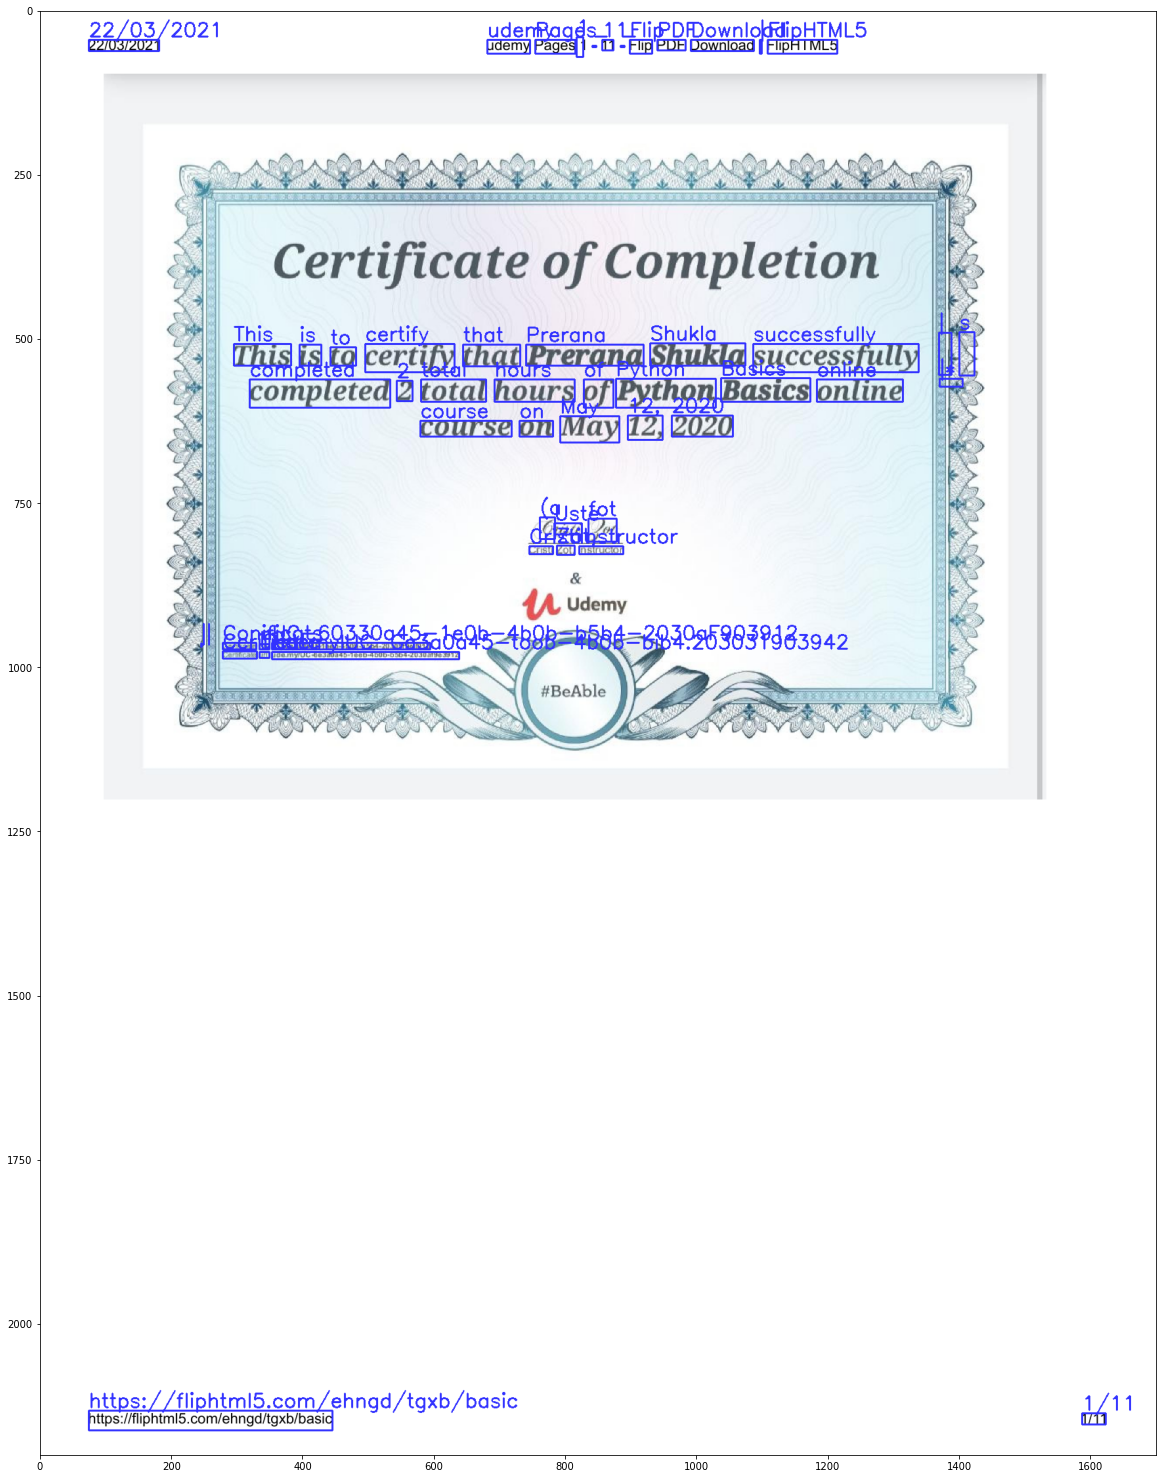

22/03/2021 udemy Pages 1 - 11 - Flip PDF Download | FlipHTML5 This is to certify that Prerana Shukla successfully | s completed 2 total hours of Python Basics online |* course on May 12, 2020 (a Uste fot Cristi Zot, Instructor || Conificats no: UC-60330a45-1e0b-4b0b-b5b4-2030aF903912 Cerificate url tidemylUC-Ga3a0a45-toob-4b0b-bib4.203031903942 https://fliphtml5.com/ehngd/tgxb/basic 1/11
level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1700	2200	-1	
2	1	1	0	0	0	74	45	107	17	-1	
3	1	1	1	0	0	74	45	107	17	-1	
4	1	1	1	1	0	74	45	107	17	-1	
5	1	1	1	1	1	74	45	107	17	96.688911	22/03/2021
2	1	2	0	0	0	272	277	2	636	-1	
3	1	2	1	0	0	272	277	2	636	-1	
4	1	2	1	1	0	272	277	2	636	-1	
5	1	2	1	1	1	272	277	2	636	95.000000	 
2	1	3	0	0	0	681	45	533	21	-1	
3	1	3	1	0	0	681	45	533	21	-1	
4	1	3	1	1	0	681	45	533	21	-1	
5	1	3	1	1	1	681	45	65	21	91.810555	udemy
5	1	3	1	1	2	754	45	61	21	96.581215	Pages
5	1	3	1	1	3	817	41	10	30	91.248528	1
5	1	3	1	1	4	841	54	6	2	91.

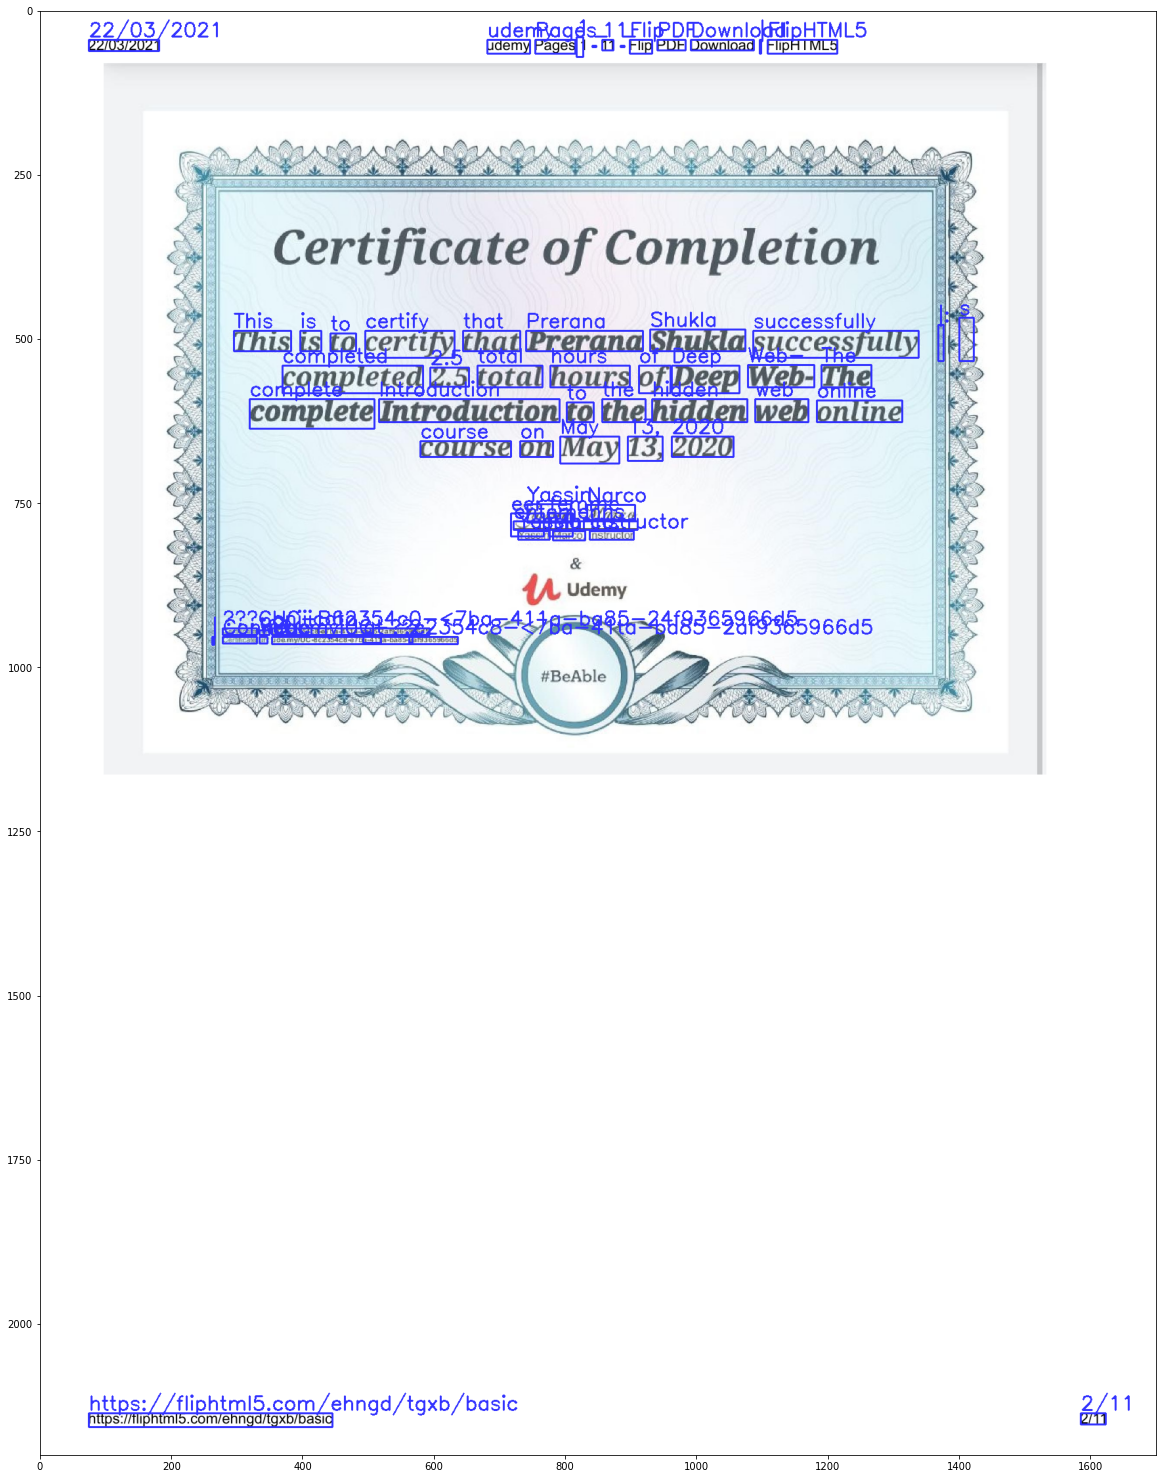

22/03/2021 udemy Pages 1 - 11 - Flip PDF Download | FlipHTML5 This is to certify that Prerana Shukla successfully |: s completed 2.5 total hours of Deep Web- The complete Introduction to the hidden web online course on May 13, 2020 Yassin Narco eer femme entemenns Yassin Marco, Instructor ‘Coniiicata no: UC-B62354c0-<7ba-411a-ba85-24f9365966d5 at 2 | Conifcae wrt udemyiUC-£c2354c8-<7ba-41ta-ba85-2af9365966d5 https://fliphtml5.com/ehngd/tgxb/basic 2/11
level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1700	2200	-1	
2	1	1	0	0	0	74	45	1140	21	-1	
3	1	1	1	0	0	74	45	1140	21	-1	
4	1	1	1	1	0	74	45	1140	21	-1	
5	1	1	1	1	1	74	45	107	17	96.688911	22/03/2021
5	1	1	1	1	2	681	45	65	21	91.810555	udemy
5	1	1	1	1	3	754	45	61	21	96.581215	Pages
5	1	1	1	1	4	817	41	10	30	91.248528	1
5	1	1	1	1	5	841	54	6	2	91.248528	-
5	1	1	1	1	6	856	45	17	16	92.560753	11
5	1	1	1	1	7	884	54	6	2	91.868271	-
5	1	1	1	1	8	898	45	34	21	96.825768	Flip
5	1	1	1	1	9	940	45	43	16	95.

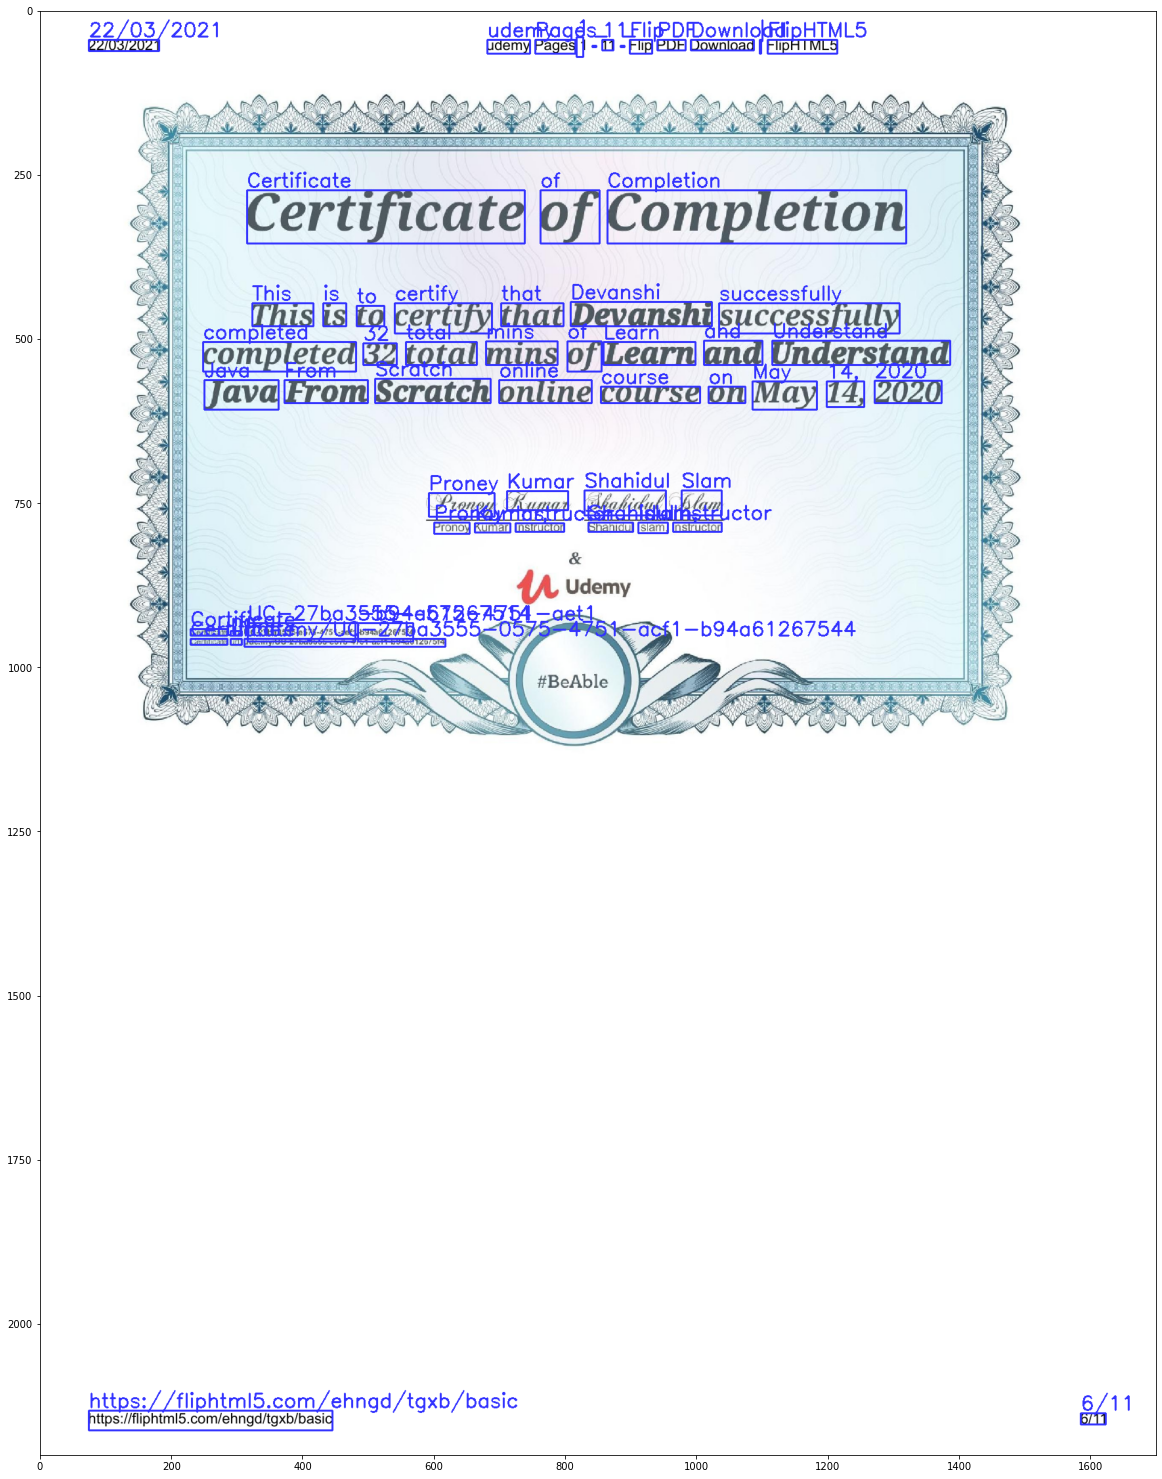

22/03/2021 udemy Pages 1 - 11 - Flip PDF Download | FlipHTML5 Certificate of Completion This is to certify that Devanshi successfully completed 32 total mins of Learn and Understand Java From Scratch online course on May 14, 2020 Proney Kumar Shahidul Slam Pronoy Kumar, Instructor Shahidul Islam, Instructor Cortificate no: UC-27ba3555-e575-4751-aet1 -b94a61267514 Certificate url: ude.my/UC-27ba3555-0575-4751-acf1-b94a61267544 https://fliphtml5.com/ehngd/tgxb/basic 6/11
level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1700	2200	-1	
2	1	1	0	0	0	74	45	1140	21	-1	
3	1	1	1	0	0	74	45	1140	21	-1	
4	1	1	1	1	0	74	45	1140	21	-1	
5	1	1	1	1	1	74	45	107	17	96.688911	22/03/2021
5	1	1	1	1	2	681	45	65	21	91.810555	udemy
5	1	1	1	1	3	754	45	61	21	96.581215	Pages
5	1	1	1	1	4	817	41	10	30	91.248528	1
5	1	1	1	1	5	841	54	6	2	91.248528	-
5	1	1	1	1	6	856	45	17	16	92.560753	11
5	1	1	1	1	7	884	54	6	2	91.868271	-
5	1	1	1	1	8	898	45	34	21	96.825768	Flip
5	1	1	1	1	

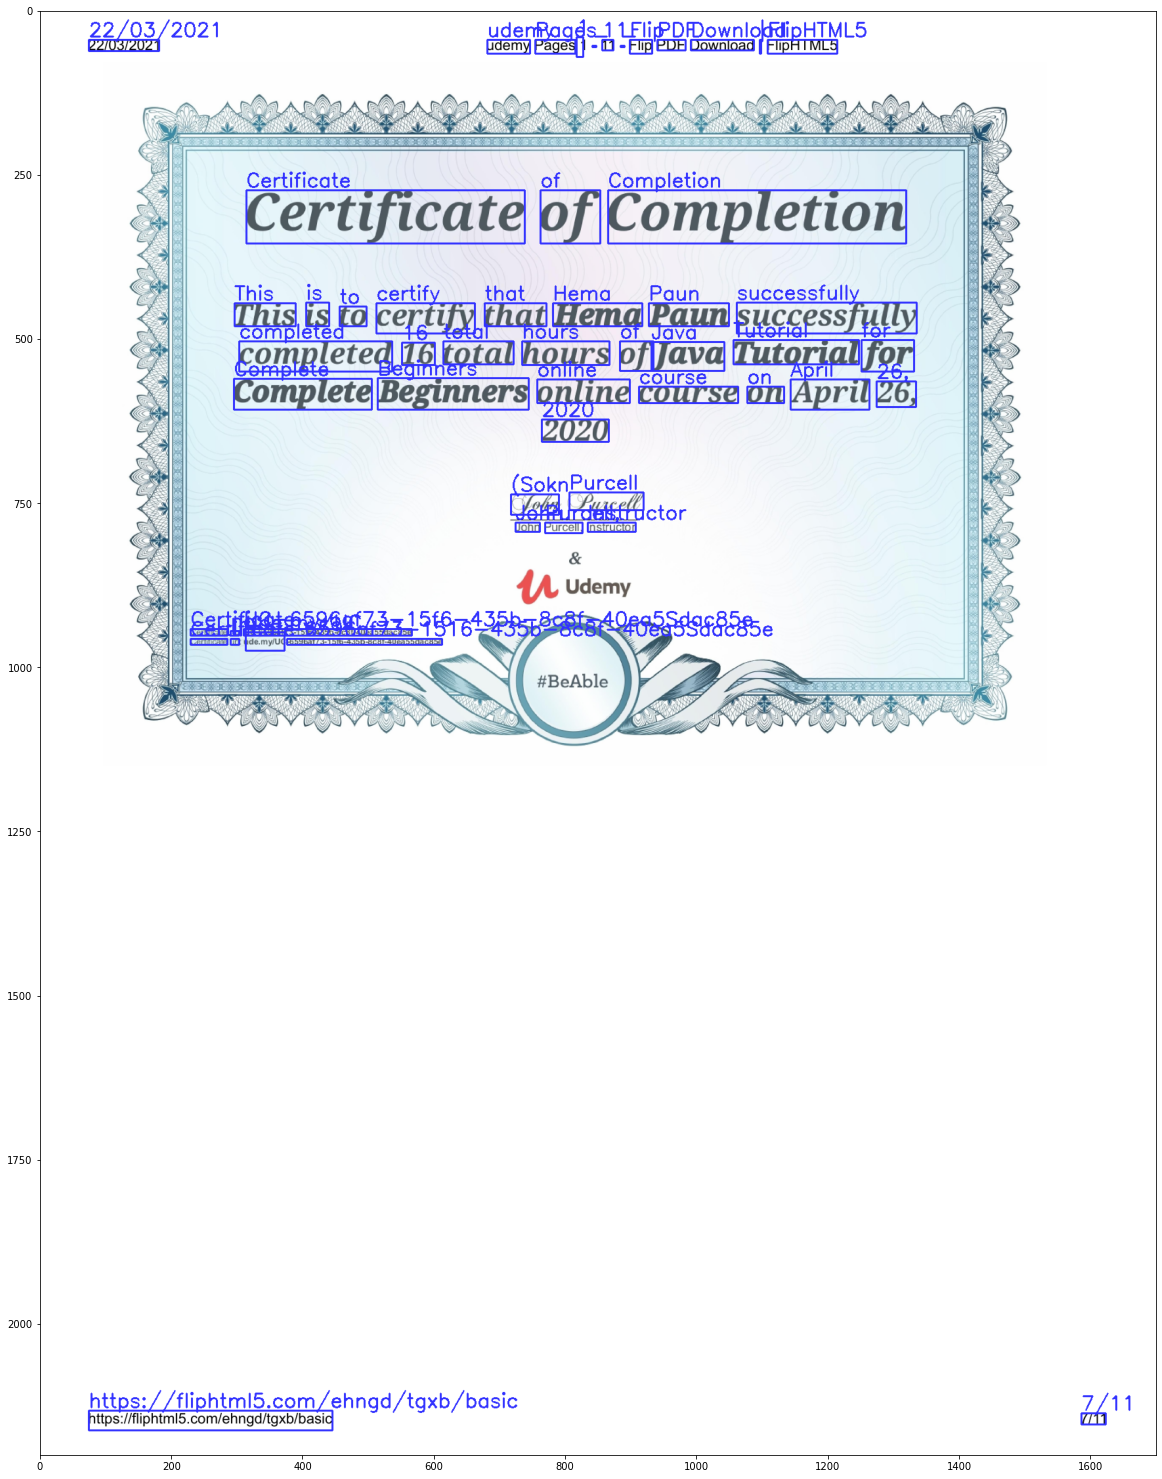

22/03/2021 udemy Pages 1 - 11 - Flip PDF Download | FlipHTML5 Certificate of Completion This is to certify that Hema Paun successfully completed 16 total hours of Java Tutorial for Complete Beginners online course on April 26, 2020 (Sokn Purcell John Purcell, Instructor Certificate no: UC-6596af73-15f6-435b-8c8f-40ea5Sdac85e Certificate url: ude.my/UC -6596af73-1516-435b-8c8f-40ea5Sdac85e https://fliphtml5.com/ehngd/tgxb/basic 7/11
level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1700	2200	-1	
2	1	1	0	0	0	74	45	1140	21	-1	
3	1	1	1	0	0	74	45	1140	21	-1	
4	1	1	1	1	0	74	45	1140	21	-1	
5	1	1	1	1	1	74	45	107	17	96.688911	22/03/2021
5	1	1	1	1	2	681	45	65	21	91.810555	udemy
5	1	1	1	1	3	754	45	61	21	96.581215	Pages
5	1	1	1	1	4	817	41	10	30	91.248528	1
5	1	1	1	1	5	841	54	6	2	91.248528	-
5	1	1	1	1	6	856	45	17	16	92.560753	11
5	1	1	1	1	7	884	54	6	2	91.868271	-
5	1	1	1	1	8	898	45	34	21	96.825768	Flip
5	1	1	1	1	9	940	45	43	16	95.973083	PDF
5	1	1	1	1

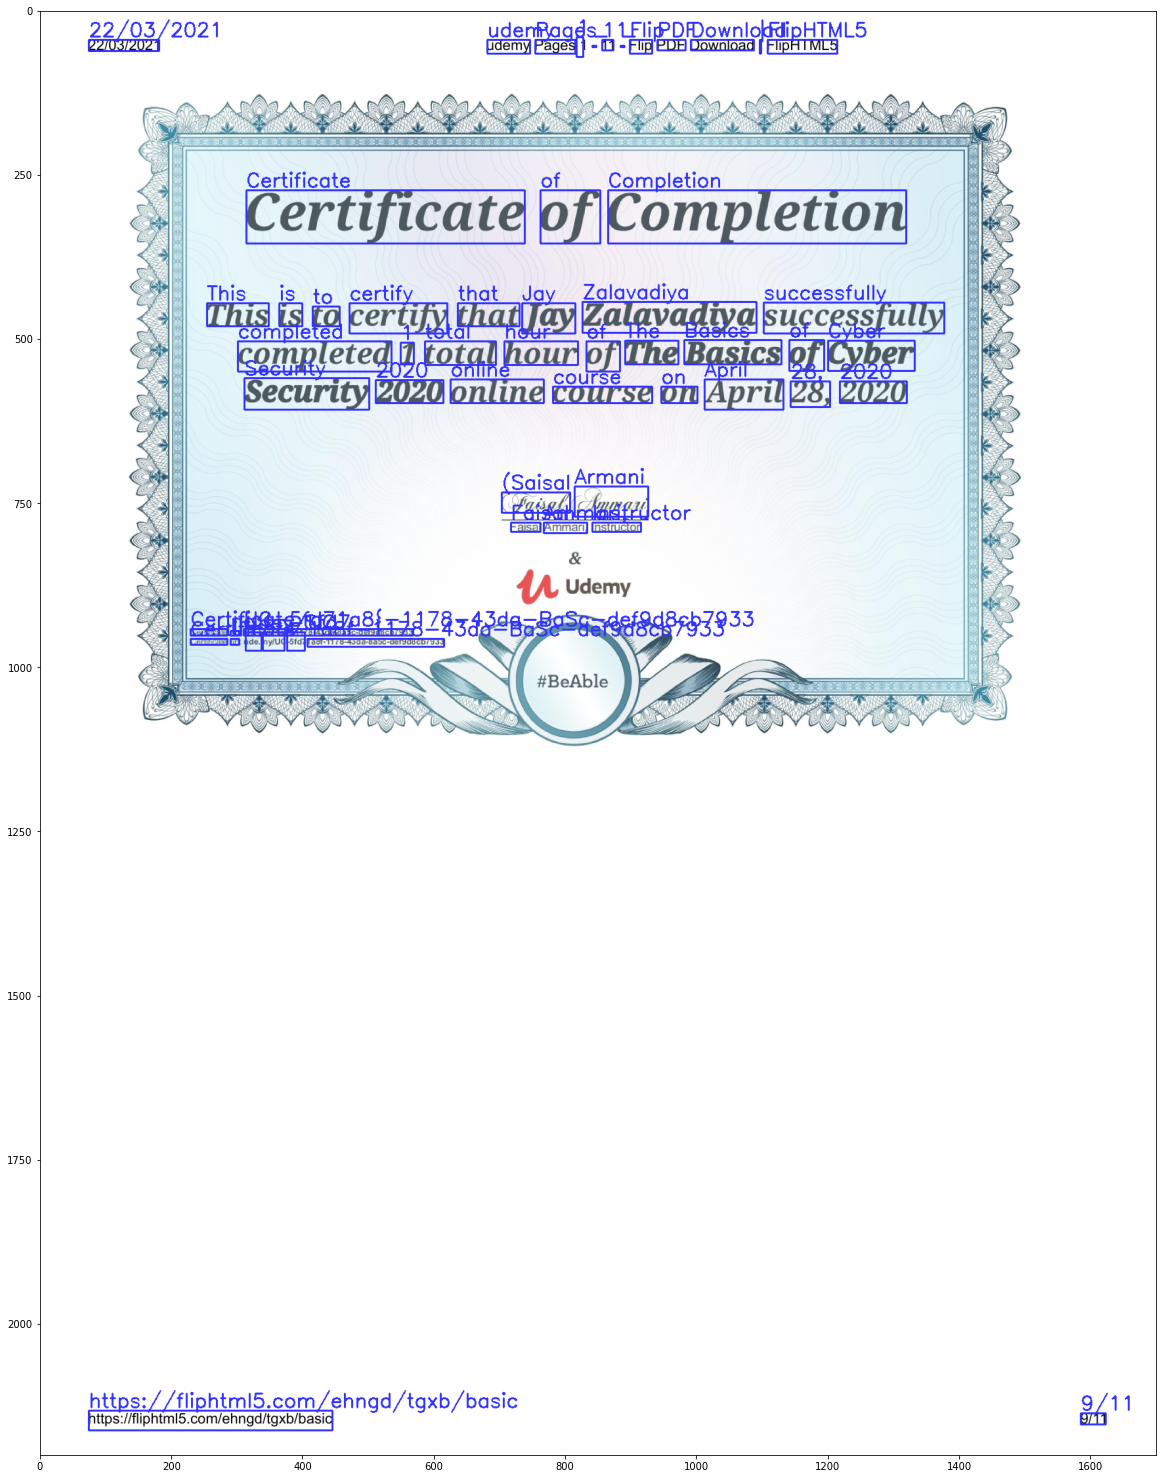

22/03/2021 udemy Pages 1 - 11 - Flip PDF Download | FlipHTML5 Certificate of Completion This is to certify that Jay Zalavadiya successfully completed 1 total hour of The Basics of Cyber Security 2020 online course on April 28, 2020 (Saisal Armani Faisal Ammari, Instructor Certificate no: UC-5fd71a8{-1178-43da-BaSc-def9d8cb7933 Certificate url: ude. my/UC -Sfd7 1a8f-1178-43da-BaSc-def9d8cb7933 https://fliphtml5.com/ehngd/tgxb/basic 9/11
level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1700	2200	-1	
2	1	1	0	0	0	74	45	107	17	-1	
3	1	1	1	0	0	74	45	107	17	-1	
4	1	1	1	1	0	74	45	107	17	-1	
5	1	1	1	1	1	74	45	107	17	96.688911	22/03/2021
2	1	2	0	0	0	195	243	2	368	-1	
3	1	2	1	0	0	195	243	2	368	-1	
4	1	2	1	1	0	195	243	2	368	-1	
5	1	2	1	1	1	195	243	2	368	95.000000	 
2	1	3	0	0	0	222	213	2	583	-1	
3	1	3	1	0	0	222	213	2	583	-1	
4	1	3	1	1	0	222	213	2	583	-1	
5	1	3	1	1	1	222	213	2	583	95.000000	 
2	1	4	0	0	0	681	45	533	21	-1	
3	1	4	1	0	0	681	45	533	21	-1

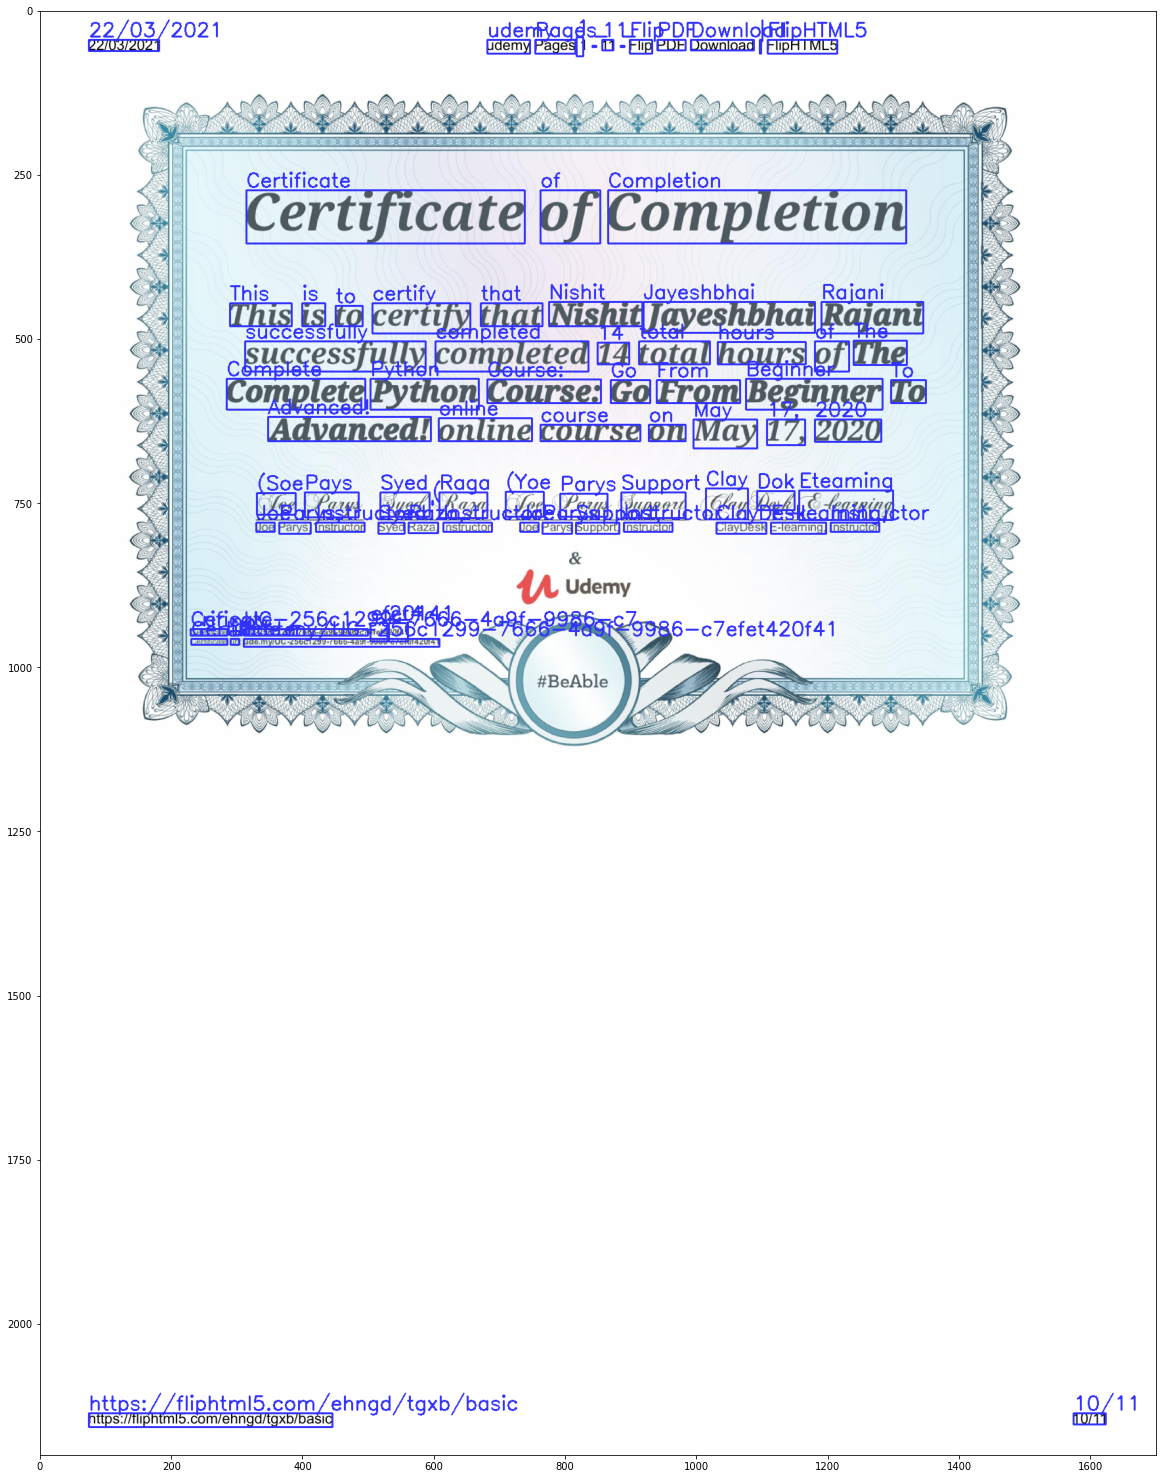

22/03/2021 udemy Pages 1 - 11 - Flip PDF Download | FlipHTML5 Certificate of Completion This is to certify that Nishit Jayeshbhai Rajani successfully completed 14 total hours of The Complete Python Course: Go From Beginner To Advanced! online course on May 17, 2020 (Soe Pays Syed ( Raga (Yoe Parys Support Clay Dok Eteaming Joe Parys, Instructor Syed Raza, Instructor Joe Parys Support, Instructor ClayDesk E-learning, Instructor rificate no: UC-256c1299-7666-4a9f-9986-c7 efef4 20141 Cer Certificate url: ude.my/UG-256c1299-7666-4a9f-9986-c7efet420f41 https://fliphtml5.com/ehngd/tgxb/basic 10/11
level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1700	2200	-1	
2	1	1	0	0	0	74	45	1140	21	-1	
3	1	1	1	0	0	74	45	1140	21	-1	
4	1	1	1	1	0	74	45	1140	21	-1	
5	1	1	1	1	1	74	45	107	17	96.688911	22/03/2021
5	1	1	1	1	2	681	45	65	21	91.810555	udemy
5	1	1	1	1	3	754	45	61	21	96.581215	Pages
5	1	1	1	1	4	817	41	10	30	91.248528	1
5	1	1	1	1	5	841	54	6	2	91.248528	

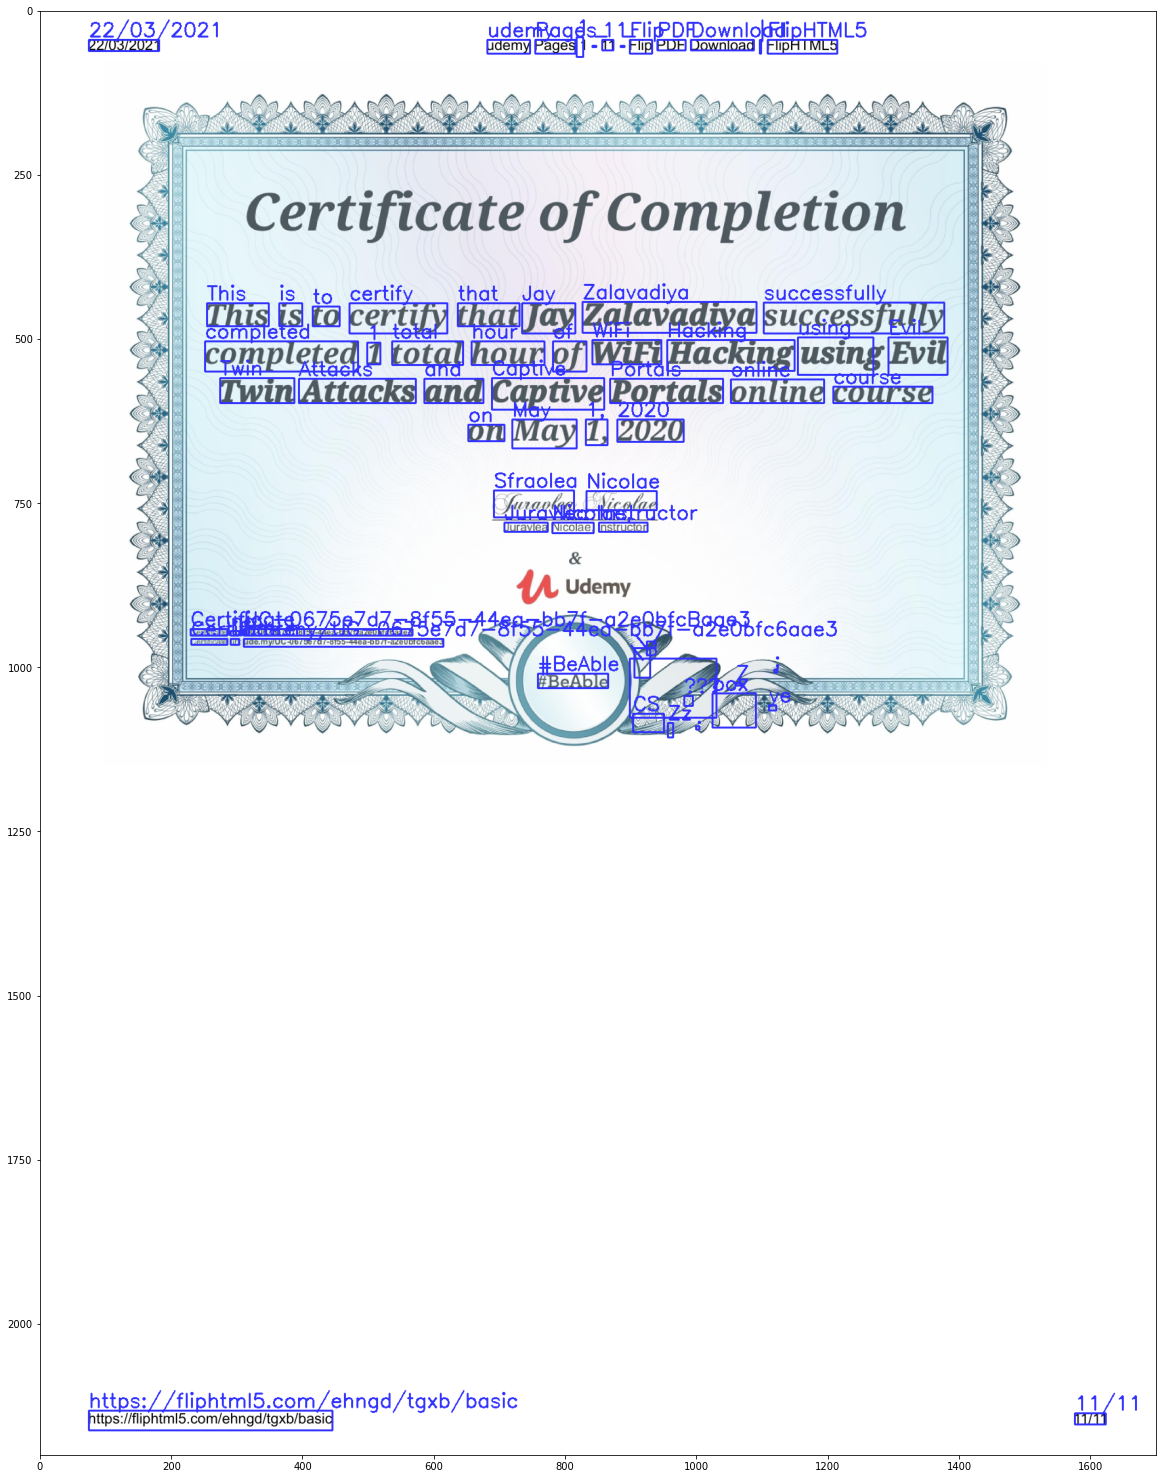

22/03/2021 udemy Pages 1 - 11 - Flip PDF Download | FlipHTML5 This is to certify that Jay Zalavadiya successfully completed 1 total hour of WiFi Hacking using Evil Twin Attacks and Captive Portals online course on May 1, 2020 Sfraolea Nicolae Juravlea Nicolae, Instructor Certificate no: UC-0675e7d7-8f55-44ea-bb7f-a2e0bfcBaae3 Certificate url: ude.my/UG-0675e7d7-8f55-44ea-bb7f-a2e0bfc6aae3 \/ ; #BeAble \B Z ” box ye CS Zz . https://fliphtml5.com/ehngd/tgxb/basic 11/11
level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1700	2200	-1	
2	1	1	0	0	0	74	45	1140	21	-1	
3	1	1	1	0	0	74	45	1140	21	-1	
4	1	1	1	1	0	74	45	1140	21	-1	
5	1	1	1	1	1	74	45	107	17	96.688911	22/03/2021
5	1	1	1	1	2	681	45	65	21	91.810555	udemy
5	1	1	1	1	3	754	45	61	21	96.581215	Pages
5	1	1	1	1	4	817	41	10	30	91.248528	1
5	1	1	1	1	5	841	54	6	2	91.248528	-
5	1	1	1	1	6	856	45	17	16	92.560753	11
5	1	1	1	1	7	884	54	6	2	91.868271	-
5	1	1	1	1	8	898	45	34	21	96.825768	Flip
5	1	1	1	1	9	

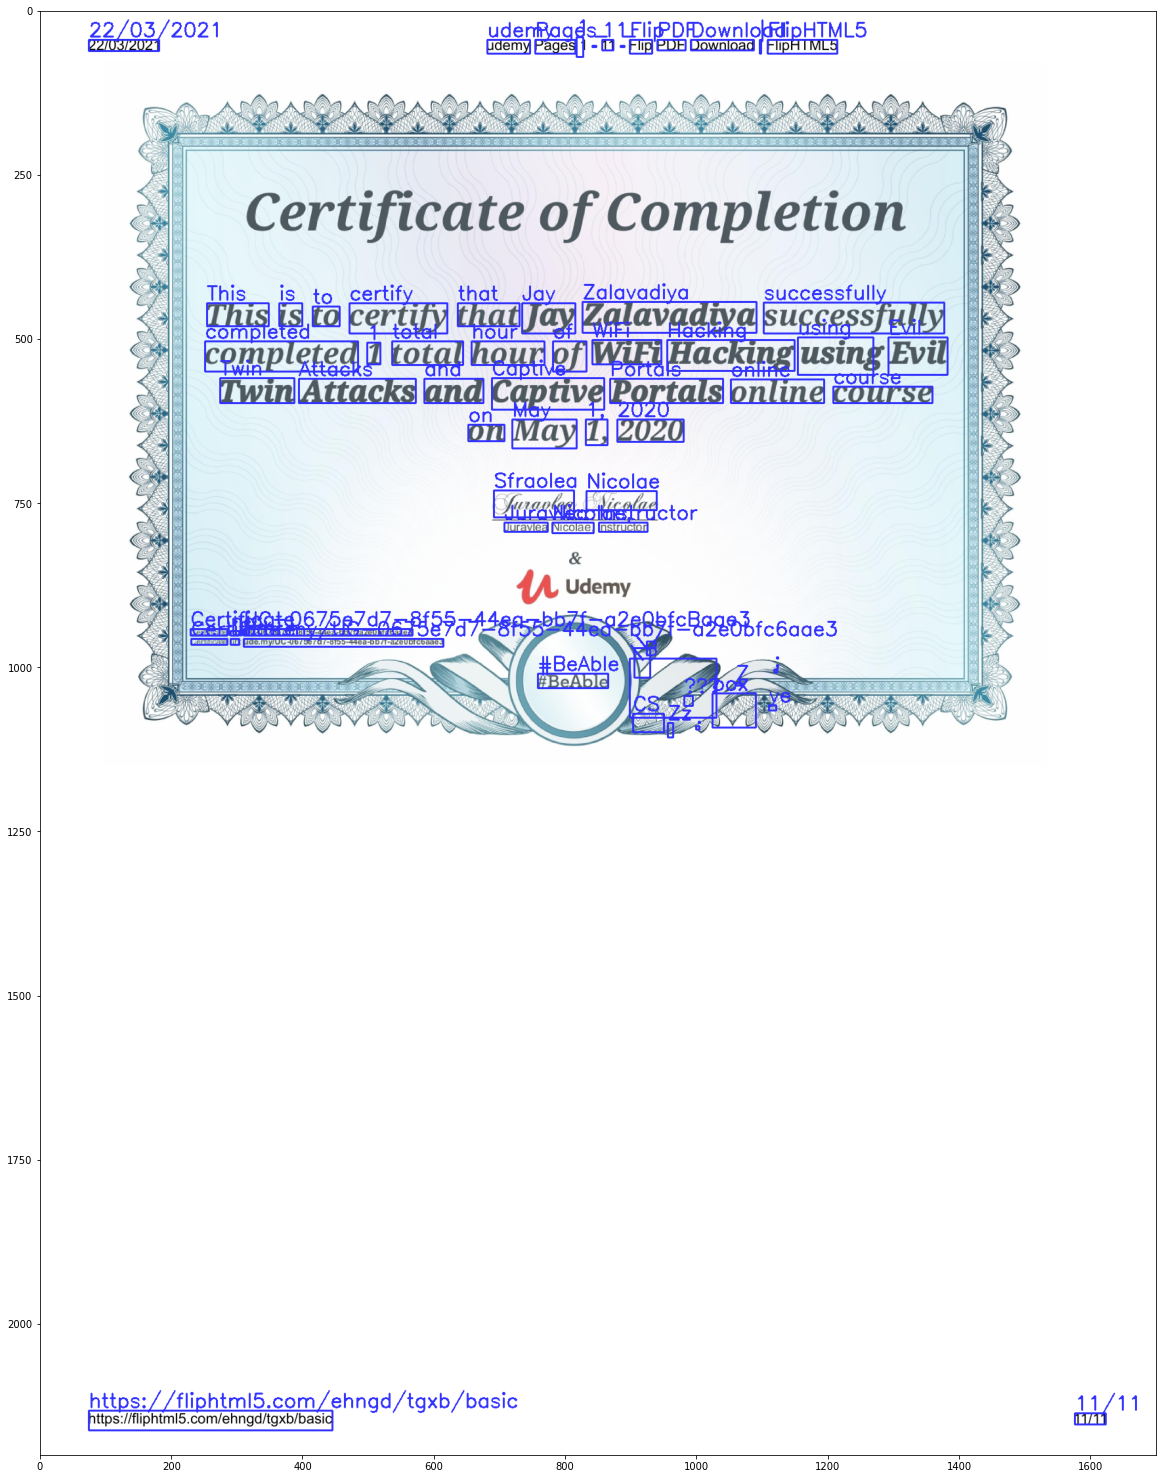

22/03/2021 udemy Pages 1 - 11 - Flip PDF Download | FlipHTML5 This is to certify that Jay Zalavadiya successfully completed 1 total hour of WiFi Hacking using Evil Twin Attacks and Captive Portals online course on May 1, 2020 Sfraolea Nicolae Juravlea Nicolae, Instructor Certificate no: UC-0675e7d7-8f55-44ea-bb7f-a2e0bfcBaae3 Certificate url: ude.my/UG-0675e7d7-8f55-44ea-bb7f-a2e0bfc6aae3 \/ ; #BeAble \B Z ” box ye CS Zz . https://fliphtml5.com/ehngd/tgxb/basic 11/11


In [7]:
for fn in range(len(pdfs_files)):

    
    # name_doc = str(time.time())
    try:
        # Converter pdf para imagem
        images = convert_from_path(pdfs_files[fn], poppler_path=r'C:\Users\shuel\Downloads\poppler-0.68.0_x86\poppler-0.68.0\bin')
    except PDFPageCountError as e:
        print('Não foi possísvel ler o pdf. Corrompido')
        LOGCORROMPIDO.append(pdfs_files[fn])
        pass
    
    for i in range(len(images)):
        images[i].save('page.png', 'PNG')
    
    # Leitura da imagem
    
    img = cv2.imread('page.png', cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    try:

        # Encontrar as palavras na imagem
        boxes = pytesseract.image_to_data(img, lang='eng')
        INFO = [] # Armazenar as informações obtidas da imagem-pdf

        # Encontrar boxes com as infos
        for a,b in enumerate(boxes.splitlines()):
            print(b)
            if a != 0:
                b = b.split()
                if len(b) == 12:
                    INFO.append(b)
                    x, y, w, h = int(b[6]), int(b[7]), int(b[8]), int(b[9])
                    cv2.putText(img, b[11], (x,y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (50,50,255), 2)
                    cv2.rectangle(img, (x,y), (x+w, y+h), (50,50,255), 2)
        fig = plt.figure(figsize=(20,50))
        ax1 = fig.add_subplot()
        plt.imshow(img)
        plt.show()

        # Limpando as informacoes dos boxes
        INFO_LIMPO = []
        for i in range (len(INFO)):
            INFO_LIMPO.append(INFO[i][-1])

        INFO_LIMPO = ' '.join(INFO_LIMPO)
        print(INFO_LIMPO)

    except:
        print('Não foi possível ler o pdf')

    try:
    # Nome do aluno
        NOME.append(re.search(r"certify that (.*[A-Za-z\s]) successfully", INFO_LIMPO).group(1))
    except AttributeError:
        print('Nome não encontrado')


In [10]:
df = pd.DataFrame({'Nome': NOME})
df

Nome
0            Prerana Shukla
1            Prerana Shukla
2                  Devanshi
3                 Hema Paun
4            Jay Zalavadiya
5  Nishit Jayeshbhai Rajani
6            Jay Zalavadiya
7            Jay Zalavadiya

In [9]:
#TODO: Tenho que ajeitar o laço for e conseguir tirar mais informações da imagem usando REGEX